ProyectoDSParte III - Data Science

Alumno: Durian Catalina

## üéØ Objetivos del Proyecto

- Predecir si un estudiante aprobar√° o no un examen final seg√∫n sus h√°bitos y condiciones personales.
- Identificar cu√°les son las variables m√°s influyentes en el rendimiento acad√©mico.
- Brindar recomendaciones basadas en datos para mejorar las estrategias de apoyo acad√©mico en instituciones educativas.


## üè´ Contexto Comercial

La instituci√≥n educativa busca mejorar la tasa de aprobaci√≥n de sus estudiantes. En este contexto, contar con herramientas que permitan predecir el rendimiento acad√©mico y entender los factores asociados al √©xito estudiantil se vuelve una prioridad estrat√©gica. Este an√°lisis permitir√° orientar campa√±as, tutor√≠as y programas de bienestar con base en datos reales y medibles.


## üìä Contexto Anal√≠tico

Se utiliz√≥ un dataset con informaci√≥n sobre h√°bitos, salud y entorno de los estudiantes. Las variables incluyen cantidad de horas de estudio, sue√±o, uso de redes sociales, asistencia a clases, entre otros.

- Se realiz√≥ una transformaci√≥n de la variable objetivo (`exam_score`) para convertirla en binaria (aprobado/desaprobado).
- Se entren√≥ un modelo de clasificaci√≥n binaria (Random Forest) con un 70% de los datos y se evalu√≥ con el 30% restante.
- Se aplicaron t√©cnicas de visualizaci√≥n y an√°lisis exploratorio para comprender la distribuci√≥n de las variables y su relaci√≥n con el rendimiento.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [3]:
# Cargar dataset
df = pd.read_csv("student_habits_performance.csv")
df.head()


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

In [4]:
# Crear columna binaria: 1 = aprobado (exam_score >= 60), 0 = desaprobado
df['target'] = df['exam_score'].apply(lambda x: 1 if x >= 60 else 0)
df['target'].value_counts()


target
1    720
0    280
Name: count, dtype: int64

In [5]:
# Eliminar columnas no relevantes
df_model = df.drop(columns=['student_id', 'exam_score'])

# Codificar variables categ√≥ricas
categorical_cols = df_model.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Separar variables predictoras y target
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']


In [6]:
# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        83
           1       0.91      0.95      0.93       217

    accuracy                           0.90       300
   macro avg       0.89      0.86      0.87       300
weighted avg       0.90      0.90      0.90       300



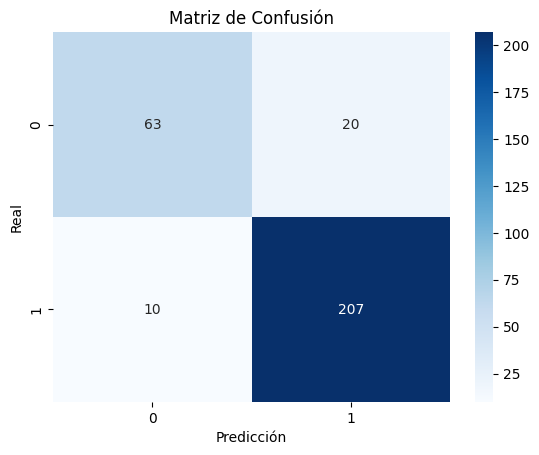

In [7]:
# Evaluaci√≥n
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Matriz de confusi√≥n
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicci√≥n")
plt.ylabel("Real")
plt.title("Matriz de Confusi√≥n")
plt.show()


In [8]:
# Importancia de variables
importances = clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 m√°s importantes
importance_df.head(10)


Feature  Importance
1     study_hours_per_day    0.475242
2      social_media_hours    0.078549
7    mental_health_rating    0.078417
5             sleep_hours    0.073621
4   attendance_percentage    0.067723
3           netflix_hours    0.061561
6      exercise_frequency    0.039100
0                     age    0.036808
8             gender_Male    0.012252
11      diet_quality_Good    0.011952

<ipython-input-9-c3d2c1d078b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


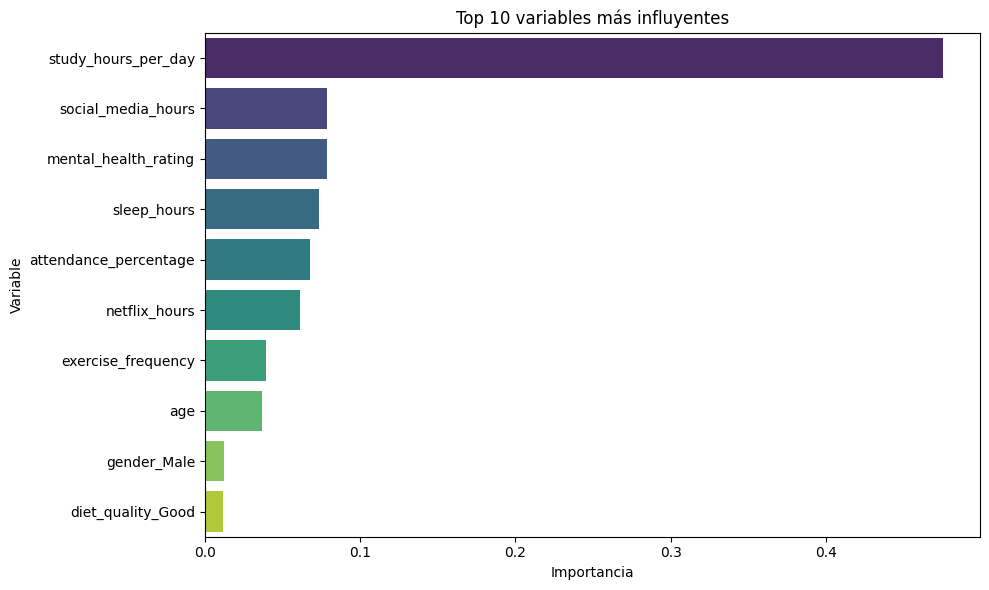

In [9]:
# Gr√°fico de las variables m√°s importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 variables m√°s influyentes")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


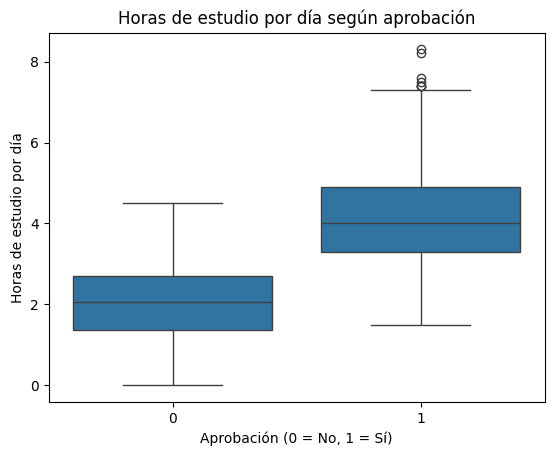

In [10]:
# Boxplot de horas de estudio por target
sns.boxplot(x='target', y='study_hours_per_day', data=df)
plt.title('Horas de estudio por d√≠a seg√∫n aprobaci√≥n')
plt.xlabel('Aprobaci√≥n (0 = No, 1 = S√≠)')
plt.ylabel('Horas de estudio por d√≠a')
plt.show()


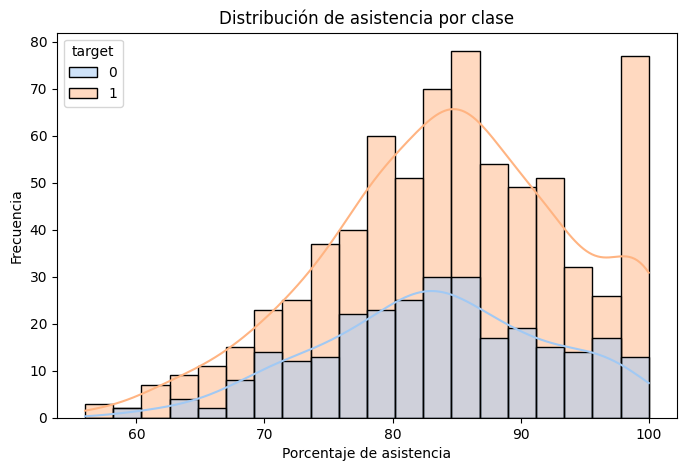

In [11]:
# Histograma de porcentaje de asistencia
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='attendance_percentage', hue='target', kde=True, bins=20, palette='pastel')
plt.title('Distribuci√≥n de asistencia por clase')
plt.xlabel('Porcentaje de asistencia')
plt.ylabel('Frecuencia')
plt.show()


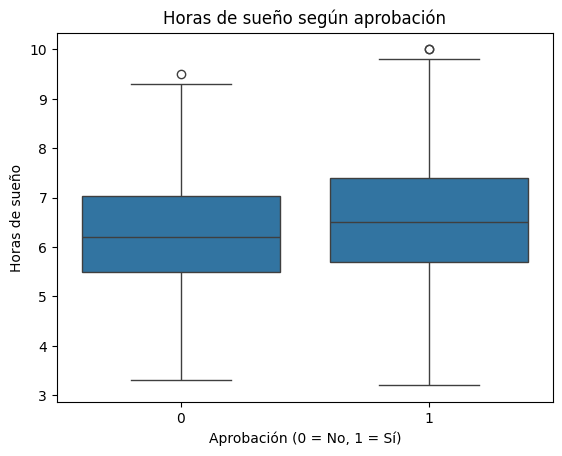

In [12]:
# Boxplot de horas de sue√±o por target
sns.boxplot(x='target', y='sleep_hours', data=df)
plt.title('Horas de sue√±o seg√∫n aprobaci√≥n')
plt.xlabel('Aprobaci√≥n (0 = No, 1 = S√≠)')
plt.ylabel('Horas de sue√±o')
plt.show()


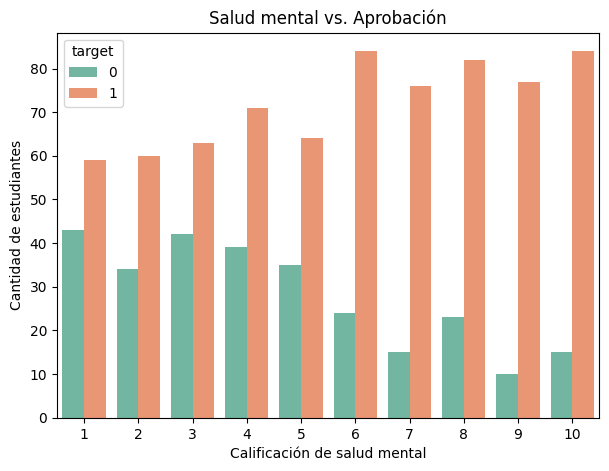

In [13]:
# Conteo de salud mental por clase
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='mental_health_rating', hue='target', palette='Set2')
plt.title('Salud mental vs. Aprobaci√≥n')
plt.xlabel('Calificaci√≥n de salud mental')
plt.ylabel('Cantidad de estudiantes')
plt.show()


## ‚úÖ Conclusiones

- El modelo Random Forest logr√≥ una precisi√≥n del 91.3%, siendo altamente efectivo para predecir qui√©nes aprobar√°n.
- Las variables m√°s influyentes fueron las **horas de estudio por d√≠a**, **asistencia a clases**, **horas de sue√±o** y **salud mental**.
- Se recomienda a la instituci√≥n reforzar pr√°cticas que promuevan una mayor dedicaci√≥n al estudio, mejor asistencia, buen descanso y acompa√±amiento psicol√≥gico.
- El enfoque predictivo permite actuar con anticipaci√≥n sobre los estudiantes en riesgo y personalizar intervenciones educativas.
